In [ ]:
import tensorflow as tf
import os


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

## Import 
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves

--2022-11-28 22:52:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-28 22:52:14 (89.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



### Get a text dataset
Disaster or not

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("nlp_getting_started.zip")

--2022-11-28 22:52:15--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-11-28 22:52:15 (92.4 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



### Visualizing a text dataset

In [ ]:
import pandas as pd
train_pd = pd.read_csv("train.csv")
test_pd = pd.read_csv("test.csv")
train_pd.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_pd["text"][1]

'Heard about #earthquake is different cities, stay safe everyone.'

In [ ]:
train_df_shuffled = train_pd.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
## How many samples
len(train_pd), len(test_pd)

(7613, 3263)

In [ ]:
## Visualize some random training examples
import random
random_index = random.randint(0,len(train_pd)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text: \n {text} \n")
  print("-"*20 )

Target: 0 (not real disaster)
Text: 
 The whole food stamp gov. assistance program needs to be retooled for wounded veterans retirees and handicapped only.  #NoMoreHandouts 

--------------------
Target: 1 (real disaster)
Text: 
 On the sneak America has us spoiled. A natural disaster will humble niggas. 

--------------------
Target: 0 (not real disaster)
Text: 
 Kids are inundated with images and information online and in media and have no way to deconstruct. - Kerri Sackville #TMS7 

--------------------
Target: 1 (real disaster)
Text: 
 Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/985DwWPdEt 

--------------------
Target: 1 (real disaster)
Text: 
 Heat wave in WB heavy losses and no compensations (report) -  http://t.co/wMDihdiz1r (via PalinfoEn)   #Palestine 

--------------------


### Split data into training and validation data

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

### Convert text into numbers


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [ ]:
text_vectorizer = TextVectorization(max_tokens=100,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)


In [ ]:
## Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]) /len(train_sentences))

15

In [ ]:
## Setup text vectorization variables
max_vocal_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocal_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
## Fit the text vectorizer to the text data
text_vectorizer.adapt(train_sentences)

In [ ]:
## Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
## Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Orginal text: \n {random_sentence}\
      \n Vectorized version:")
text_vectorizer([random_sentence])

Orginal text: 
 @ARobotLegion so be it. You can't tell an oppressed group of people how to react to trauma. That would be stupid and ignorant.      
 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,   28,   21,   15,   12,   98,  639,   39,    1,  484,    6,
          57,   62,    5, 4787]])>

In [ ]:
## Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
words_in_vocab[-10:]

['painthey',
 'painful',
 'paine',
 'paging',
 'pageshi',
 'pages',
 'paeds',
 'pads',
 'padres',
 'paddytomlinson1']

### Creating an Embedding and an Embedding layer

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim=max_vocal_length,
                                      output_dim=128,
                                      input_length=max_length)
embedding

In [ ]:
#Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Orginal text:\n {random_sentence}\
      \n Embedded version:")

# Embed the random sentence (turn it into dense vecor of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Orginal text:
 So today I fell off a rock scraped my whole butt and nearly drowned #summer2k15      
 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02482123, -0.02902283,  0.02012086, ...,  0.04946879,
         -0.03798892,  0.03142003],
        [ 0.03667847, -0.00680675,  0.03503188, ..., -0.04716485,
          0.00143301, -0.03719693],
        [-0.03141075, -0.00855949,  0.0347758 , ..., -0.01802447,
          0.03552038, -0.02452849],
        ...,
        [-0.03027288,  0.01986141,  0.03986789, ...,  0.04761219,
         -0.0017422 ,  0.03699232],
        [ 0.02640961,  0.00763178,  0.02406663, ...,  0.01146192,
         -0.00167776,  0.02742438],
        [ 0.01234808, -0.02278775,  0.01535806, ..., -0.02302582,
         -0.04796129,  0.00827605]]], dtype=float32)>

### Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), ## convert words to numbers
    ("clf", MultinomialNB())
])

## Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
## Evaluate our baselinne model
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [ ]:
baseline_preds = model_0.predict(val_sentences)

In [ ]:
### Creating an evaluation function for our model experiments
## Function to evaluate: accuracy, precision, recall, f1-score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculating model accurancy, precision, recall and f1 score
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  ## Calculate model precision
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  
  model_results = {"accuracy": model_accuracy,
                   "precision":model_precision * 100,
                   "recall":model_recall * 100,
                   "f1":model_f1 * 100}

  return model_results


In [ ]:
## Get baseline results
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 81.11390004213173,
 'recall': 79.26509186351706,
 'f1': 78.6218975804955}

### Model 1: Simple dense model

In [ ]:
## Build model with the Functional API

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="mode_1_dense")

In [ ]:
model_1.summary()

Model: "mode_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
No

In [ ]:
train_sentences.shape, train_labels.shape


((6851,), (6851,))

In [ ]:
## Compile model_1
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              verbose=0)

In [ ]:
baseline_preds = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [ ]:
model_1_preds = tf.squeeze(tf.round(baseline_preds))

In [ ]:
baseline_results = calculate_results(val_labels, model_1_preds)
baseline_results

{'accuracy': 77.55905511811024,
 'precision': 77.6733420725316,
 'recall': 77.55905511811024,
 'f1': 77.38609431347062}

### Reccurent Neural Networks (RNN's)

Useful for sequence data.
The premise of a neural network is to use the representation of a previous input to aid the representation of  a later input

### Model 2: LSTM

Structure:
- Input -> Tokenize -> Embedding -> Layers(RNNs/dense) -> Output

In [ ]:
## Create an LSTM model
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

## When stacking RNN cells together, you need to  set return_sequences=True

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
## Compile 
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
## Fit
history_model_2 = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 45ms/step - loss: 0.1509 - accuracy: 0.9505 - val_loss: 0.7029 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 8s 36ms/step - loss: 0.0907 - accuracy: 0.9658 - val_loss: 0.6813 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 9s 42ms/step - loss: 0.0786 - accuracy: 0.9698 - val_loss: 1.0904 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 12s 58ms/step - loss: 0.0655 - accuracy: 0.9742 - val_loss: 1.0187 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 8s 36ms/step - loss: 0.0573 - accuracy: 0.9758 - val_loss: 1.0788 - val_accuracy: 0.7651


In [ ]:
## Make predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:5]

24/24 [==============================] - 1s 8ms/step


array([[2.7648991e-01],
       [8.1975436e-01],
       [9.9989855e-01],
       [4.7233216e-02],
       [1.4476420e-04]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
## Calculate model 2 results
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 76.50918635170603,
 'precision': 76.5325307490926,
 'recall': 76.50918635170603,
 'f1': 76.37474572934757}

## Model 3: GRU 

In [ ]:
## Create an GRU model
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
x = tf.keras.layers.GRU(64, return_sequences=True)(x)
x = tf.keras.layers.GRU(64)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                       

In [ ]:
## Compile 
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
## Fit
history_model_3 = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 13s 41ms/step - loss: 0.1178 - accuracy: 0.9574 - val_loss: 0.9102 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0672 - accuracy: 0.9730 - val_loss: 1.0811 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0574 - accuracy: 0.9765 - val_loss: 1.1046 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 8s 36ms/step - loss: 0.0532 - accuracy: 0.9774 - val_loss: 1.2980 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0472 - accuracy: 0.9781 - val_loss: 1.3053 - val_accuracy: 0.7664


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

24/24 [==============================] - 1s 6ms/step


{'accuracy': 76.64041994750657,
 'precision': 76.64644290702826,
 'recall': 76.64041994750657,
 'f1': 76.5226875463096}

### Model 4: Bidirectional

In [ ]:
## Create an Bidirectional model
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64))(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:
model_4.summary()


Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [ ]:
## Compile 
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
## Fit
history_model_4 = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 22s 66ms/step - loss: 0.0919 - accuracy: 0.9704 - val_loss: 1.0909 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 12s 58ms/step - loss: 0.0445 - accuracy: 0.9797 - val_loss: 1.4880 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 13s 58ms/step - loss: 0.0401 - accuracy: 0.9793 - val_loss: 1.8865 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 13s 62ms/step - loss: 0.0424 - accuracy: 0.9790 - val_loss: 1.7946 - val_accuracy: 0.7493
Epoch 5/5
215/215 [==============================] - 11s 53ms/step - loss: 0.0431 - accuracy: 0.9796 - val_loss: 1.8898 - val_accuracy: 0.7612


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

24/24 [==============================] - 2s 10ms/step


{'accuracy': 76.11548556430446,
 'precision': 76.17086366916097,
 'recall': 76.11548556430446,
 'f1': 75.94983627881854}

### Test: Convolution 1D Neural Networks

Inputs(text) -> Tokenization -> Embedding -> Layers (Conv1D + pooling) -> Outputs

In [ ]:
## Test
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = tf.keras.layers.Conv1D(filters=32,
                                 kernel_size=5,
                                 activation="relu",
                                 padding="same")
conv_1d_output = conv_1d(embedding_test)
max_pool = tf.keras.layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
# embedding_test

In [ ]:
# conv_1d_output

In [ ]:
# max_pool_output

### Model 5: Convolution 1D Neural Networks

In [ ]:
## Create an Conv1D model
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
x = tf.keras.layers.Conv1D(filters=64, 
                           kernel_size=3,
                           strides=1,
                           activation="relu", 
                           padding="same")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
# x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [ ]:
## Compile 
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
## Fit
history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1312 - accuracy: 0.9546 - val_loss: 0.8699 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0762 - accuracy: 0.9718 - val_loss: 1.0128 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0573 - accuracy: 0.9762 - val_loss: 1.1660 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0519 - accuracy: 0.9778 - val_loss: 1.1650 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0456 - accuracy: 0.9797 - val_loss: 1.3121 - val_accuracy: 0.7664


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

24/24 [==============================] - 0s 4ms/step


{'accuracy': 76.64041994750657,
 'precision': 76.87205386590334,
 'recall': 76.64041994750657,
 'f1': 76.38750072248874}

### Model 6: TensorFlow Hub (USE feature extractor)

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,"fdfdfdf pay the bill, wow sentence"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
## Create model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_6_USE")



In [ ]:
## Compile 
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
## Fit
history_model_6 = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 6s 16ms/step - loss: 0.5031 - accuracy: 0.7851 - val_loss: 0.4647 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4153 - accuracy: 0.8145 - val_loss: 0.4437 - val_accuracy: 0.8018
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4016 - accuracy: 0.8224 - val_loss: 0.4428 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3932 - accuracy: 0.8227 - val_loss: 0.4358 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3869 - accuracy: 0.8295 - val_loss: 0.4300 - val_accuracy: 0.8176


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

24/24 [==============================] - 1s 12ms/step


{'accuracy': 81.75853018372703,
 'precision': 81.90970972170162,
 'recall': 81.75853018372703,
 'f1': 81.63657584501131}

### Model 7: TF Hub Pretrained USE but with 10% of training data

In [ ]:
## leads to leakage
train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [ ]:
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
train_10_sentences, val_10_sentences, train_10_labels, val_10_labels = train_test_split(train_10_percent['text'].to_numpy(),
                                                                            train_10_percent['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
## Create model using Sequential API
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_7_USE")



In [ ]:
## Compile 
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
## Fit
history_model_7 = model_7.fit(train_10_sentences,
                              train_10_labels,
                              epochs=5,
                              validation_data=(val_10_sentences, val_10_labels))

Epoch 1/5
22/22 [==============================] - 2s 39ms/step - loss: 0.6759 - accuracy: 0.6623 - val_loss: 0.6459 - val_accuracy: 0.7273
Epoch 2/5
22/22 [==============================] - 0s 16ms/step - loss: 0.6152 - accuracy: 0.7734 - val_loss: 0.5852 - val_accuracy: 0.7143
Epoch 3/5
22/22 [==============================] - 0s 15ms/step - loss: 0.5458 - accuracy: 0.7880 - val_loss: 0.5308 - val_accuracy: 0.7273
Epoch 4/5
22/22 [==============================] - 0s 13ms/step - loss: 0.4876 - accuracy: 0.7924 - val_loss: 0.4930 - val_accuracy: 0.7532
Epoch 5/5
22/22 [==============================] - 0s 15ms/step - loss: 0.4457 - accuracy: 0.8056 - val_loss: 0.4704 - val_accuracy: 0.7662


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

24/24 [==============================] - 1s 10ms/step


{'accuracy': 80.83989501312337,
 'precision': 80.81729505537831,
 'recall': 80.83989501312337,
 'f1': 80.81456453762286}

In [ ]:
## Combine model results into a DataFrame
all_model_results = pd.DataFrame({"model_1_simple_dense":baseline_results,
                                  "model_2_lstm": model_2_results,
                                  "model_3_gru": model_3_results,
                                  "model_4_bidirectional": model_4_results,
                                  "model_5_conv1d": model_5_results,
                                  "model_6_tf_hub_use": model_6_results,
                                  "model_7_hub_use_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_1_simple_dense,77.559055,77.673342,77.559055,77.386094
model_2_lstm,76.509186,76.532531,76.509186,76.374746
model_3_gru,76.640420,76.646443,76.640420,76.522688
model_4_bidirectional,76.115486,76.170864,76.115486,75.949836
model_5_conv1d,76.640420,76.872054,76.640420,76.387501
model_6_tf_hub_use,81.758530,81.909710,81.758530,81.636576
model_7_hub_use_10_percent,80.839895,80.817295,80.839895,80.814565


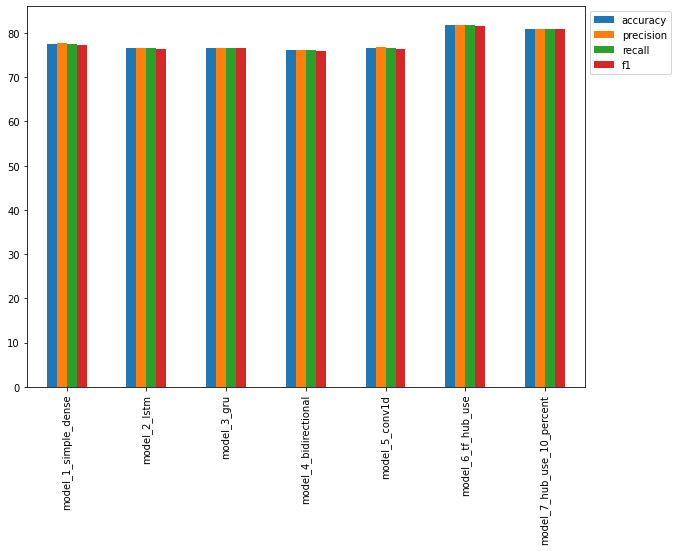

In [ ]:
## Plot and compare all of model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

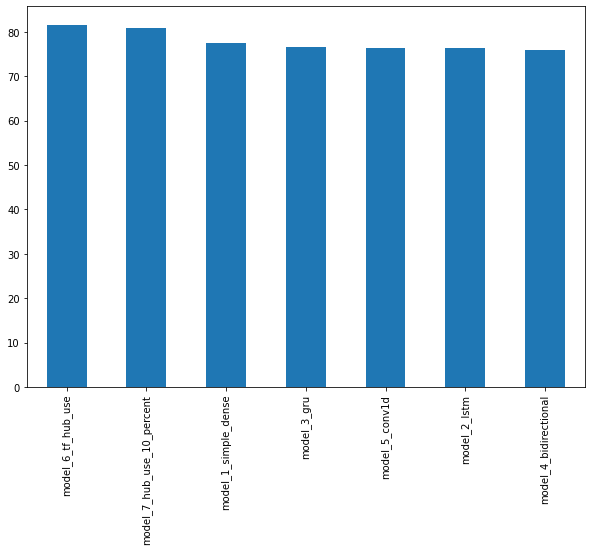

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

## Saving and loading a trained model
1. The HDF5 format
2. THE 'SaveModel' format

In [ ]:
## Save TF Gub Sentence Encoder
model_6.save("model_6.h5")


In [ ]:
## Load model 
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4300 - accuracy: 0.8176


[0.43001437187194824, 0.817585289478302]

In [ ]:
## Save 'SavedModel' format
model_6.save("model_6_SavedModel_format")

In [ ]:
## Load in a model from a 'SavedModel' format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4300 - accuracy: 0.8176


[0.43001437187194824, 0.817585289478302]

### Finding the most wrong examples

In [ ]:
# Create DataFrame with validation sentences and best performing model predictions

model_6_pred_probs = model_6.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 0s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.165752
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.740723
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.987113
3,@camilacabello97 Internally and externally scr...,1,0.0,0.207808
4,Radiation emergency #preparedness starts with ...,1,1.0,0.761703
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.103097
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.126126
759,FedEx will no longer transport bioterror patho...,0,1.0,0.874909
760,Crack in the path where I wiped out this morni...,0,1.0,0.699822


In [ ]:
## Find the wrong predictions and sort by predictions probabilities

most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.914114
759,FedEx will no longer transport bioterror patho...,0,1.0,0.874909
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.850219
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.842665
628,@noah_anyname That's where the concentration c...,0,1.0,0.842556
...,...,...,...,...
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.045668
233,I get to smoke my shit in peace,1,0.0,0.035157
38,Why are you deluged with low self-image? Take ...,1,0.0,0.034444
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.032493


In [ ]:
## Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"\n Target: {target}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Text: \n {text}\n")
  print("----"*30)


 Target: 0, Pred: 1.0, Prob: 0.9141139388084412
Text: 
 ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

------------------------------------------------------------------------------------------------------------------------

 Target: 0, Pred: 1.0, Prob: 0.8749088048934937
Text: 
 FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

------------------------------------------------------------------------------------------------------------------------

 Target: 0, Pred: 1.0, Prob: 0.8502185940742493
Text: 
 @SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

------------------------------------------------------------------------------------------------------------------------

 Target: 0, Pred: 1.0, Prob: 0.842665433883667
Text: 
 Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

In [ ]:
## Check the false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"\n Target: {target}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Text: \n {text}\n")
  print("----"*30)


 Target: 1, Pred: 0.0, Prob: 0.06344281136989594
Text: 
 VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

------------------------------------------------------------------------------------------------------------------------

 Target: 1, Pred: 0.0, Prob: 0.055897943675518036
Text: 
 @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

------------------------------------------------------------------------------------------------------------------------

 Target: 1, Pred: 0.0, Prob: 0.05262371152639389
Text: 
 going to redo my nails and watch behind the scenes of desolation of smaug ayyy

------------------------------------------------------------------------------------------------------------------------

 Target: 1, Pred: 0.0, Prob: 0.05122336372733116
Text: 
 Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'e

In [ ]:
# Lets make a function to measure the time of prediction

import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred



In [ ]:
model_6_total_time, model_6_time_per_pred = pred_timer(model_6,
                                                       val_sentences)

24/24 [==============================] - 0s 10ms/step


In [ ]:
model_0_total_time, model_0_time_per_pred = pred_timer(model_0,
                                                       val_sentences)

In [ ]:
model_6_total_time, model_6_time_per_pred

(0.30024174800007586, 0.0003940180419948502)

In [ ]:
model_0_total_time, model_0_time_per_pred 

(0.022642552999968757, 2.971463648289863e-05)